In [1]:
import os
import shutil
from pathlib import Path

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_DIR = Path('/content/unpacked/')
    PACK_DIR = Path('/content/drive/My Drive/colab_drive/prepacked.zip')
    shutil.copy(PACK_DIR, '/content/')
    !unzip -o -q /content/prepacked.zip -d {DATA_DIR}
else:
    DATA_DIR= Path(os.path.join(os.getcwd(), "../data/")).resolve()
DATA_DIR

PosixPath('/Volumes/Backup/Workspace/ML/WV-Team/data')

In [8]:
import re
import glob
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# CSV 로드 및 정리, 본인 경로에 맞게 변환
CSV_PATH = DATA_DIR / 'kfold_result.csv'
IMAGE_SIZE = (256, 256)

In [6]:
df = pd.read_csv(CSV_PATH, dtype={"id": str})
# 모델 이름을 x축 인덱스로 사용
x = range(len(df))
names = df["name"]

df.head()

,index,name,dropout,use_bn,dense_act,loss_mean,loss_std,acc_mean,acc_std,prec_macro_mean,prec_macro_std,best_f1_macro_mean,best_f1_macro_std,last_f1_macro_mean,last_f1_macro_std
0,0,relu,0.0,False,relu,4.042616,0.541877,0.501709,0.018951,0.414351,0.040631,0.416206,0.024500,0.395115,0.030738
1,1,relu_do01,0.1,False,relu,4.091324,0.684038,0.497020,0.022134,0.410174,0.027201,0.417142,0.030157,0.383712,0.030214
2,2,gelu,0.0,False,gelu,3.852971,0.650101,0.517406,0.021464,0.427175,0.025686,0.430416,0.030402,0.387274,0.027722
3,3,gelu_bn,0.0,True,gelu,1.916293,0.369105,0.582415,0.035134,0.523458,0.038630,0.494050,0.016185,0.450844,0.056420
4,4,gelu_do03,0.3,False,gelu,2.916763,0.623768,0.512726,0.027751,0.424310,0.069630,0.408040,0.044510,0.375206,0.041421


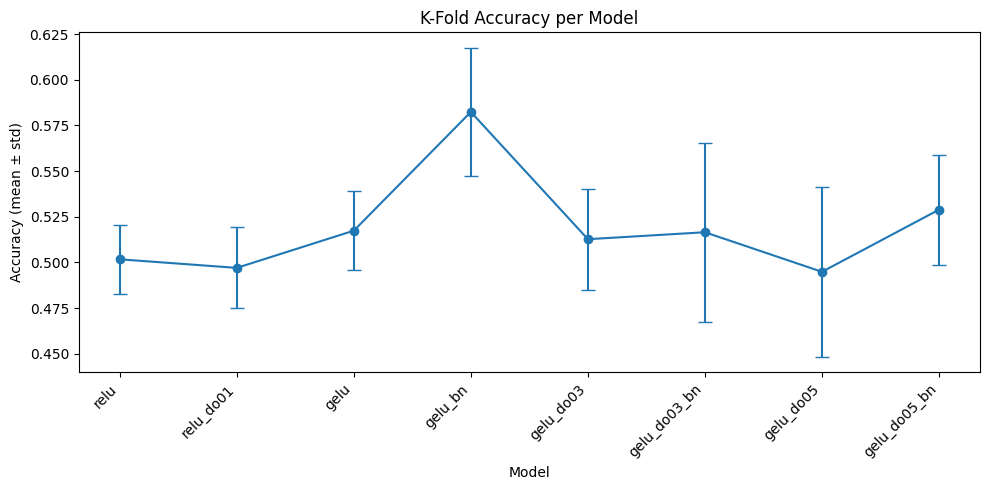

In [9]:
# ===== 1) Accuracy plot =====
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["acc_mean"], yerr=df["acc_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Accuracy (mean ± std)")
plt.title("K-Fold Accuracy per Model")
plt.tight_layout()
plt.show()

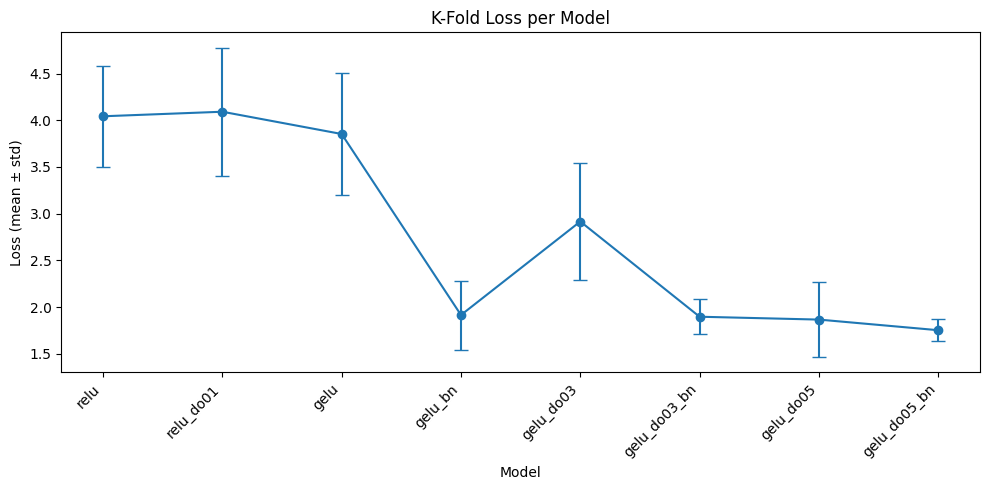

In [10]:
# ===== 2) Loss plot =====
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["loss_mean"], yerr=df["loss_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Loss (mean ± std)")
plt.title("K-Fold Loss per Model")
plt.tight_layout()
plt.show()

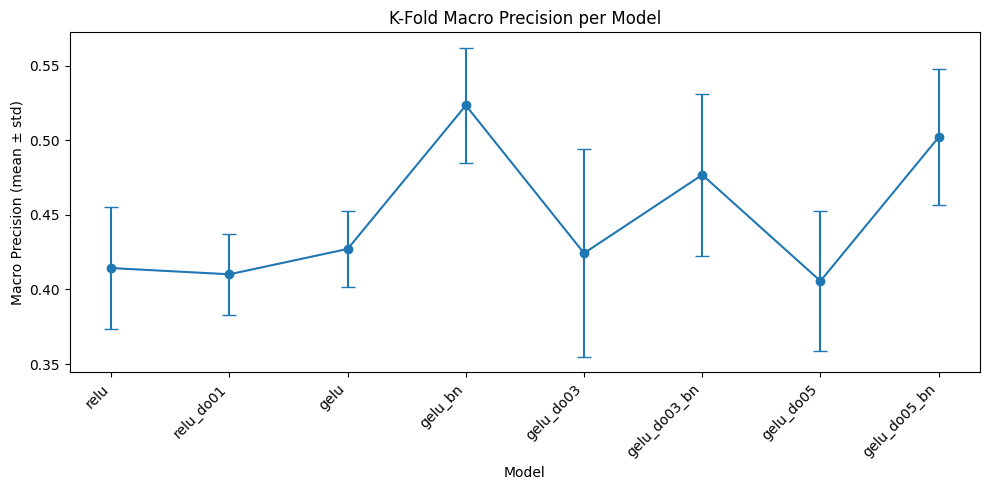

In [11]:
# ===== 3) Macro Precision plot =====
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["prec_macro_mean"], yerr=df["prec_macro_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Macro Precision (mean ± std)")
plt.title("K-Fold Macro Precision per Model")
plt.tight_layout()
plt.show()

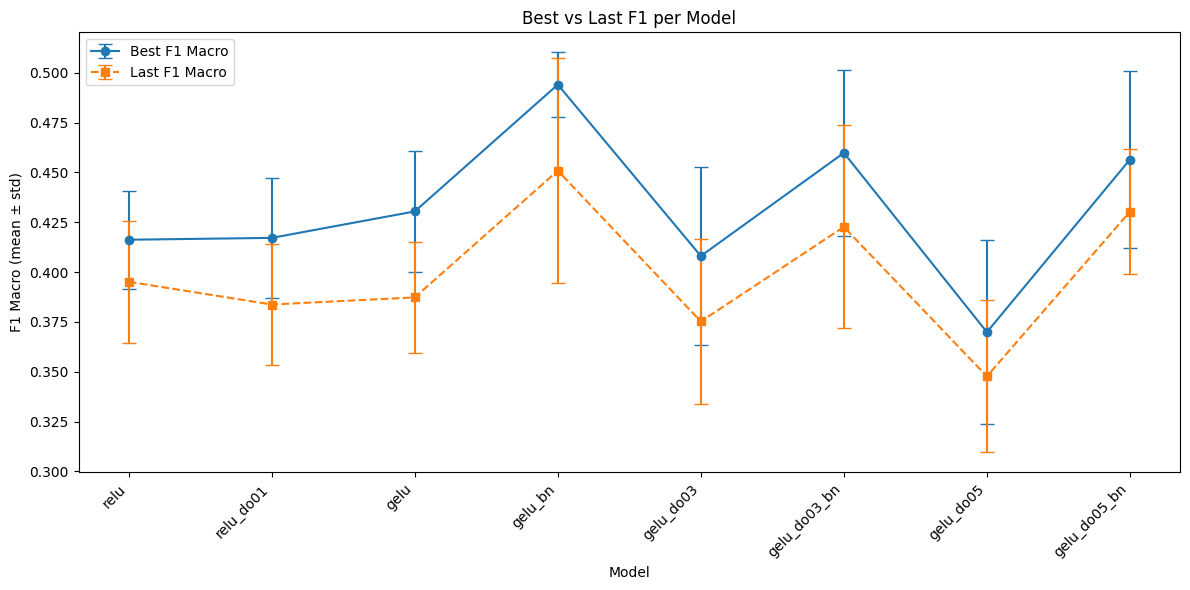

In [12]:
# ===== 4) Best F1 vs Last F1 plot =====
plt.figure(figsize=(12, 6))
plt.errorbar(
    x, df["best_f1_macro_mean"], yerr=df["best_f1_macro_std"],
    fmt='o-', capsize=5, label="Best F1 Macro"
)
plt.errorbar(
    x, df["last_f1_macro_mean"], yerr=df["last_f1_macro_std"],
    fmt='s--', capsize=5, label="Last F1 Macro"
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("F1 Macro (mean ± std)")
plt.title("Best vs Last F1 per Model")
plt.legend()
plt.tight_layout()
plt.show()